In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv('top_insta_influencers_data.csv')

In [12]:
df.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [13]:
df.shape

(200, 10)

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

rank                 0
channel_info         0
influence_score      0
posts                0
followers            0
avg_likes            0
60_day_eng_rate      0
new_post_avg_like    0
total_likes          0
country              0
dtype: int64

In [17]:
post=list(df['posts'])
post1=list()
for num in post:
  if 'k' in num:
    new_num=1000*float(num.replace('k',''))
    post1.append(new_num)
  else:
    post1.append(float(num))
df['posts']=post1

followers=list(df['followers'])
followers1=list()
for num in followers:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        followers1.append(new_num)
    else:
        followers1.append(float(num))
df['followers']=followers1

avg_likes=list(df['avg_likes'])
avg_likes1=list()
for num in avg_likes:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        avg_likes1.append(new_num)
    else:
        new_num=1000*float(num.replace('k',''))
        avg_likes1.append(new_num)
df['avg_likes']=avg_likes1

new_post_avg_like=list(df['new_post_avg_like'])  
new_post_avg_like1=list()
for num in new_post_avg_like:
    if 'm' in num:
        new_num=1000000*float(num.replace('m',''))
        new_post_avg_like1.append(new_num)    
    else:
       new_num=1000*float(num.replace('k',''))
       new_post_avg_like1.append(new_num)
df['new_post_avg_like']=new_post_avg_like1

total_likes=list(df['total_likes']) 
total_likes1=list()
for num in total_likes:
    if 'b' in num:
        new_num=1000000000*float(num.replace('b',''))
        total_likes1.append(new_num)
    else:
        new_num=1000000*float(num.replace('m',''))
        total_likes1.append(new_num)
df['total_likes']=total_likes1

day_eng_rate=list(df['60_day_eng_rate'])
day_eng_rate1=list()
for num in day_eng_rate:
    if '%' in num:
        new_num=float(num.replace('%',''))
        day_eng_rate1.append(new_num)
    else:
        new_num=float(num)
        day_eng_rate1.append(new_num)
df['60_day_eng_rate']=day_eng_rate1

# Are there any correlated features in the given dataset? If yes, state the correlationcoefficient of the pair of features which are highly correlated.

In [18]:
df.corr()

,rank,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
rank,1.000000,-0.487032,-0.038108,-0.702439,-0.455890,-0.007923,-0.402640,-0.467826
influence_score,-0.487032,1.000000,0.162550,0.443995,0.210109,-0.107452,0.170787,0.297215
posts,-0.038108,0.162550,1.000000,0.047782,-0.319911,-0.357878,-0.253575,0.193972
followers,-0.702439,0.443995,0.047782,1.000000,0.610347,-0.093967,0.523557,0.694309
avg_likes,-0.455890,0.210109,-0.319911,0.610347,1.000000,0.495045,0.871394,0.667124
60_day_eng_rate,-0.007923,-0.107452,-0.357878,-0.093967,0.495045,1.000000,0.707013,0.054885
new_post_avg_like,-0.402640,0.170787,-0.253575,0.523557,0.871394,0.707013,1.000000,0.579299
total_likes,-0.467826,0.297215,0.193972,0.694309,0.667124,0.054885,0.579299,1.000000


# What is the frequency distribution of the following features?
○ Influence Score
○ Followers
○ Posts

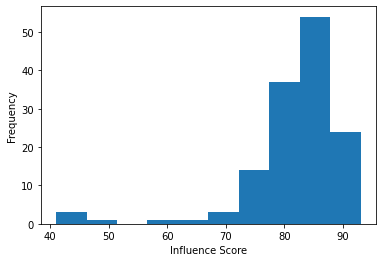

In [59]:
import matplotlib.pyplot as plt
plt.hist(df['influence_score'])
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.show()

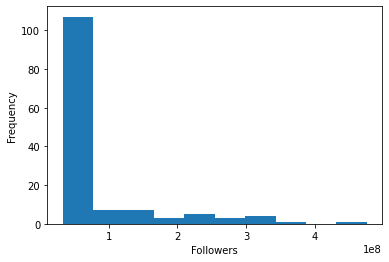

In [60]:
import matplotlib.pyplot as plt
plt.hist(df['followers'])
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.show()

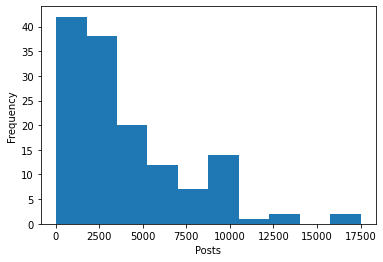

In [61]:
import matplotlib.pyplot as plt
plt.hist(df['posts'])
plt.xlabel('Posts')
plt.ylabel('Frequency')
plt.show()

# Which country houses the highest number of Instagram Influencers? Please show the count of Instagram influencers in different countries using barchart.

In [27]:
country_counts=df['country'].value_counts().sort_values(ascending=False)

In [28]:
highest_count_country = country_counts.index[0]

In [30]:
# Print the result
print("The country with the highest number of Instagram influencers is:", highest_count_country)

The country with the highest number of Instagram influencers is: United States


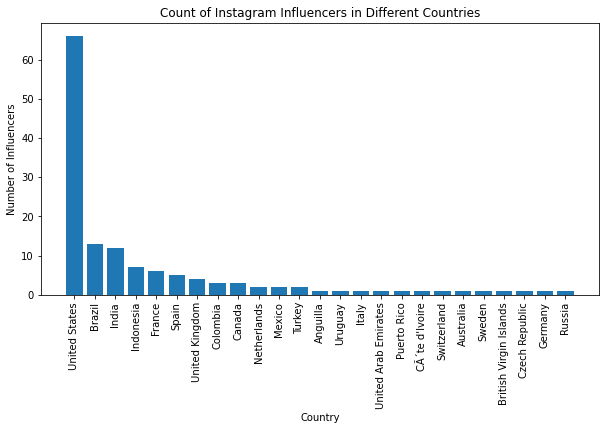

In [32]:
# Create a bar chart of the count of influencers in different countries
plt.figure(figsize=(10,5))
plt.bar(country_counts.index, country_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.title('Count of Instagram Influencers in Different Countries')
plt.show()



# Who are the top 10 influencers in the given dataset based on the following features
● Followers
● Average likes
● Total Likes

In [34]:
top_followers = df.sort_values(by='followers', ascending=False).head(10)

# Sort the dataset by Average Likes
top_avg_likes = df.sort_values(by='avg_likes', ascending=False).head(10)

# Sort the dataset by Total Likes
top_total_likes = df.sort_values(by='total_likes', ascending=False).head(10)

In [40]:
print("Top 10 influencers based on Followers:\n", top_followers[['channel_info', 'followers']])


Top 10 influencers based on Followers:
        channel_info    followers
0         cristiano  475800000.0
1       kyliejenner  366200000.0
3       selenagomez  342700000.0
4           therock  334100000.0
5     kimkardashian  329200000.0
6      arianagrande  327700000.0
7           beyonce  272800000.0
8   khloekardashian  268300000.0
9      justinbieber  254500000.0
10    kendalljenner  254000000.0


In [37]:
# Print out the top 10 influencers based on Average Likes
print("\nTop 10 influencers based on Average Likes:\n", top_avg_likes[['channel_info', 'avg_likes']])



Top 10 influencers based on Average Likes:
            channel_info  avg_likes
0             cristiano  8700000.0
1           kyliejenner  8300000.0
3           selenagomez  6200000.0
22              zendaya  5800000.0
10        kendalljenner  5500000.0
118                zayn  4700000.0
97                adele  4700000.0
114         harrystyles  4700000.0
56   bts.bighitofficial  4100000.0
75     milliebobbybrown  4000000.0


In [39]:
# Print out the top 10 influencers based on Total Likes
print("\nTop 10 influencers based on Total Likes:\n", top_total_likes[['channel_info', 'total_likes']])


Top 10 influencers based on Total Likes:
      channel_info   total_likes
1     kyliejenner  5.740000e+10
0       cristiano  2.900000e+10
22        zendaya  2.060000e+10
5   kimkardashian  1.990000e+10
6    arianagrande  1.840000e+10
25     badgalriri  1.790000e+10
19       neymarjr  1.410000e+10
9    justinbieber  1.390000e+10
16     nickiminaj  1.350000e+10
4         therock  1.250000e+10


# Describe the relationship between the following pairs of features using a suitable graph
● Followers and Total Likes
● Followers and Influence Score
● Posts and Average likes
● Posts and Influence Score

In [49]:
import plotly.express as px

In [51]:
# create a scatter plot of Followers vs. Total Likes
fig1 = px.scatter(df, x="followers", y="total_likes", title="Followers vs. Total Likes")
fig1.show()


In [52]:
# create a scatter plot of Followers vs. Influence Score
fig2 = px.scatter(df, x="followers", y="influence_score", title="Followers vs. Influence Score")
fig2.show()

In [53]:
# create a scatter plot of Posts vs. Average likes
fig3 = px.scatter(df, x="posts", y="avg_likes", title="Posts vs. Average likes")
fig3.show()

In [54]:
# create a scatter plot of Posts vs. Influence Score
fig4 = px.scatter(df, x="posts", y="influence_score", title="Posts vs. Influence Score")
fig4.show()